## 9.1 A Brief matplotlib API Primer

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

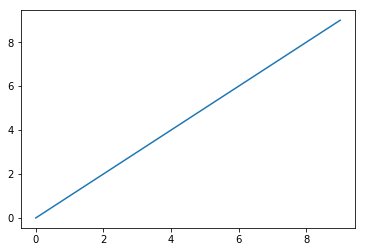

In [2]:
data = np.arange(10)
plt.plot(data)

## Figures and Subplots

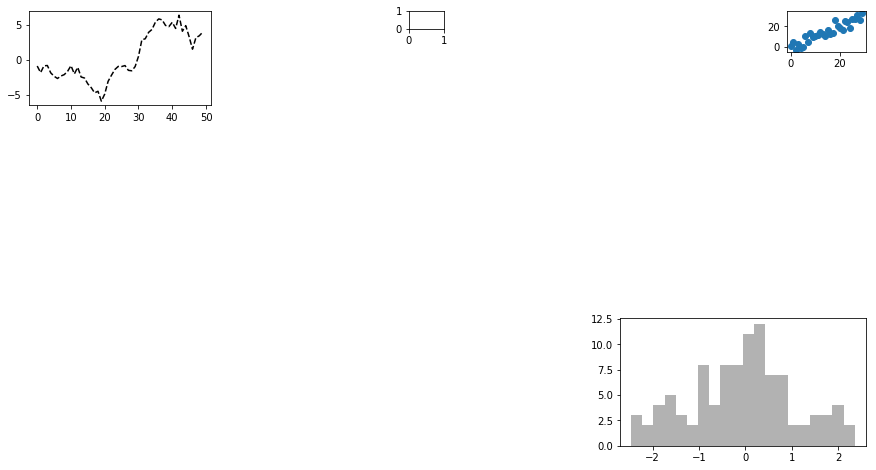

In [3]:
fig = plt.figure(figsize=(15,8)) #on détermine la taille
ax1=plt.subplot(441)
ax2=plt.subplot(999)
ax3=plt.subplot(339)
ax4=fig.add_subplot(20,20,10)

ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30)) #scatter == dispersion
ax1.plot(np.random.randn(50).cumsum(),'k--')
_=ax3.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)

# les indices 444 par exemple c'est une séparation 4 sur 4 et on met à une certaine position de 1 à 4*4=16

In [4]:
# see the sharex for share the same scale...

### Adjusting the spacing around subplots

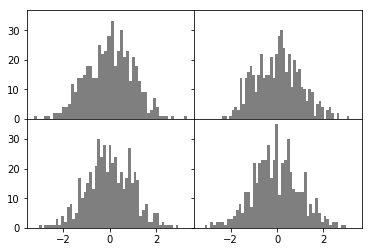

In [5]:
fig, axes = plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='k',alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0)

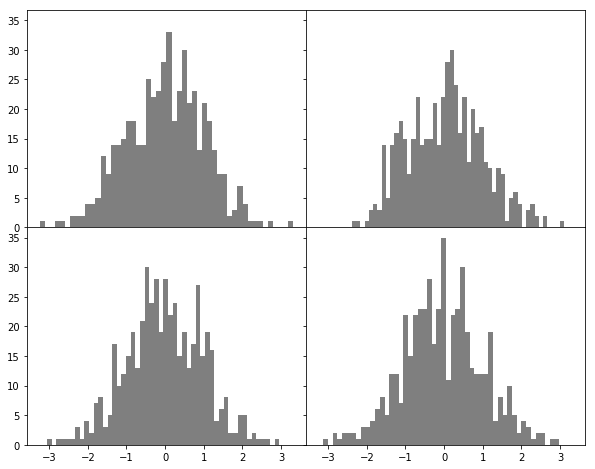

In [6]:
fig.set_size_inches(10,8)
fig

## Colors, Markers and Line Styles

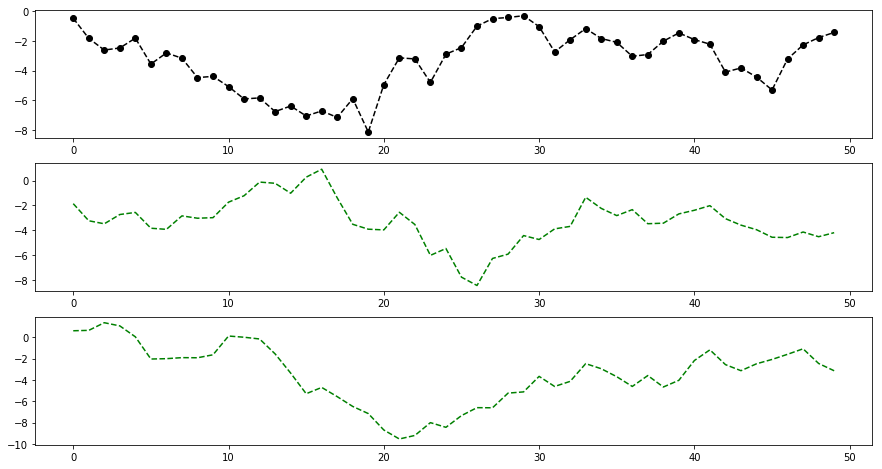

In [7]:
fig = plt.figure()
plt.subplot(311).plot(np.random.randn(50).cumsum(),'ko--')
plt.subplot(312).plot(np.random.randn(50).cumsum(),'g--')
plt.subplot(313).plot(np.random.randn(50).cumsum(),linestyle="--",color='g') # the same effect
fig.set_size_inches(15,8)

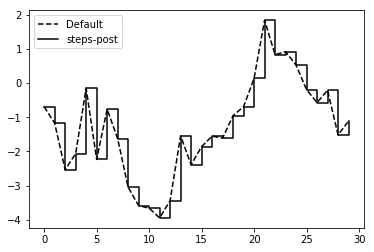

In [8]:
data = np.random.randn(30).cumsum()
plt.plot(data,'k--',label='Default')
plt.plot(data,'k-',drawstyle='steps-post',label='steps-post')
plt.legend(loc='best') #localisation best, où ça correspond au mieux

## Ticks, Labels, and Legends

Text(0.5,0,'Stages')

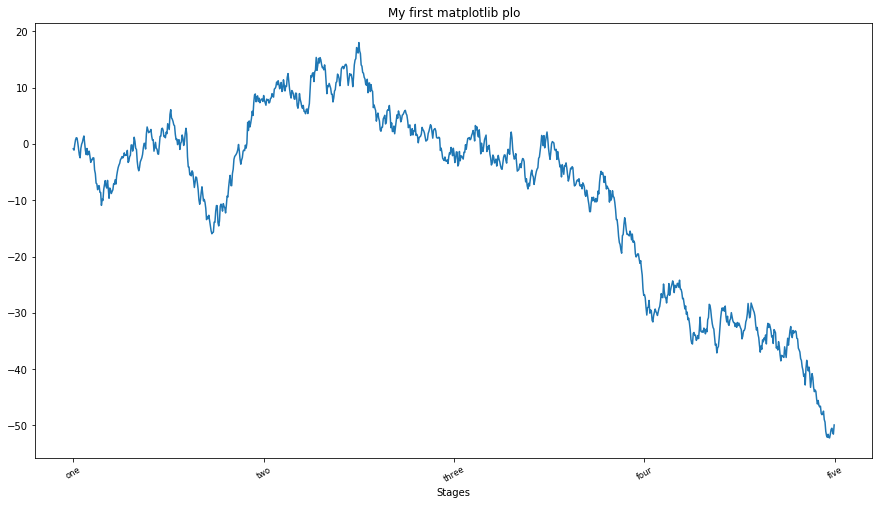

In [9]:
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],rotation=30,fontsize='small')
ax.set_title('My first matplotlib plo')
ax.set_xlabel('Stages')

### Adding legends

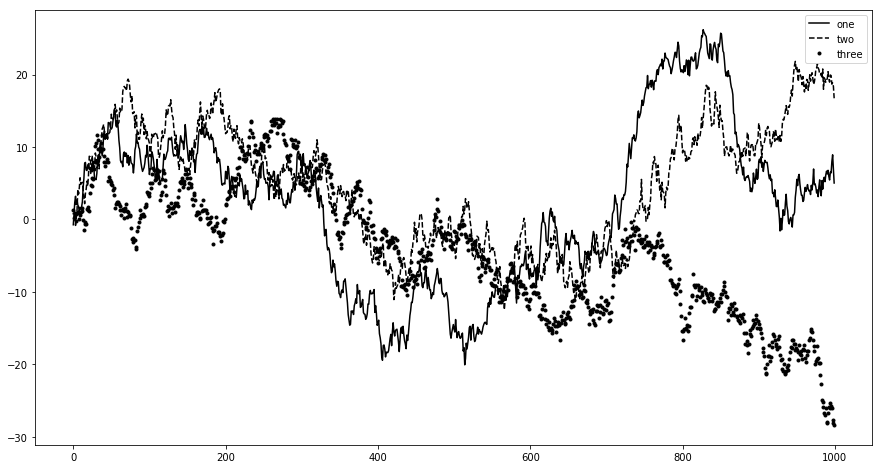

In [10]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
df = pd.DataFrame(np.random.randn(1000).cumsum())
ax.plot(df,'k',label='one')
ax.plot(np.random.randn(1000).cumsum(),'k--',label='two')
ax.plot(np.random.randn(1000).cumsum(),'k.',label='three')
ax.legend(loc='best')

## Annotations and Drawing on a Subplot

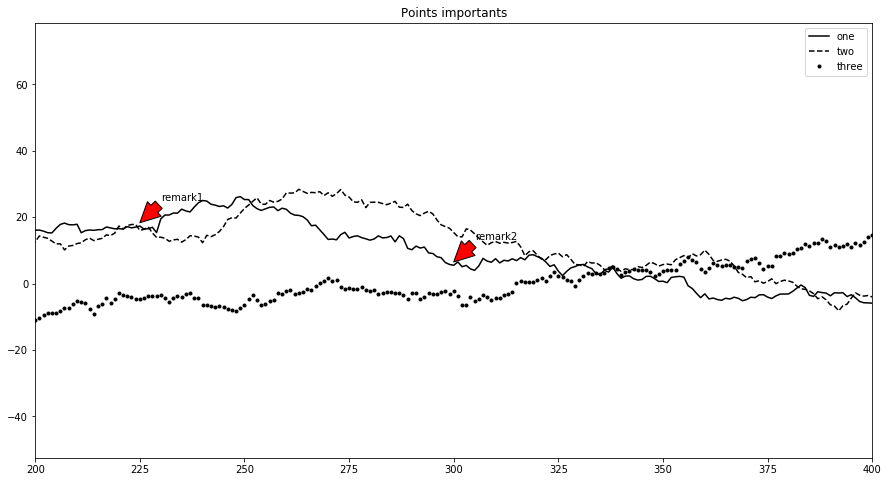

In [11]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
df = pd.DataFrame(np.random.randn(1000).cumsum())
ax.plot(df,'k',label='one')
ax.plot(np.random.randn(1000).cumsum(),'k--',label='two')
ax.plot(np.random.randn(1000).cumsum(),'k.',label='three')
ax.legend(loc='best')

ax.set_xlim([200,400]) #zoom sur la rangée 200 à 400
ax.set_title('Points importants')
etapes = [
    (225,'remark1'),
    (300,'remark2')
]
for point, texte in etapes:
    ax.annotate(texte,xy = (point, df.asof(point)+1), xytext = (point+5, df.asof(point)+10),
                arrowprops=dict(facecolor='red',headwidth=20,width=10,headlength=20),
               horizontalalignment='left',verticalalignment='top')
    # Warning .asof uniquement sur un dataframe... une interpolation ??
plt.savefig('figure.svg')


# 9.2 Plotting with pandas and seaborn
## Line Plots

__plotting series__

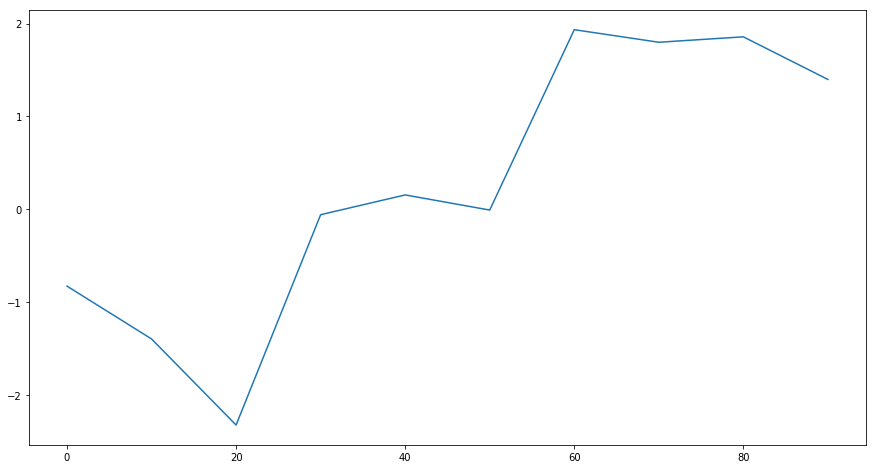

In [12]:
s = pd.Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
s.plot(figsize=(15,8))

__plotting dataframes__

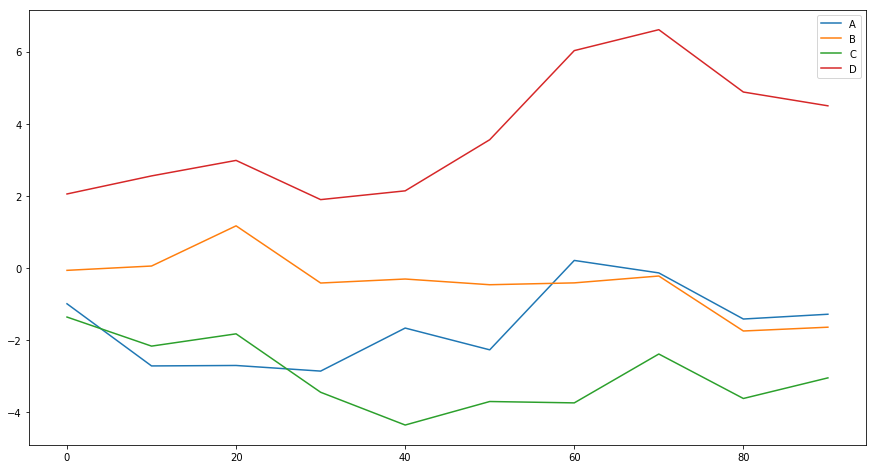

In [13]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),columns=['A','B','C','D'], index=np.arange(0,100,10))
df.plot(figsize=(15,8))
#or df.plot.line()

## Bar Plots

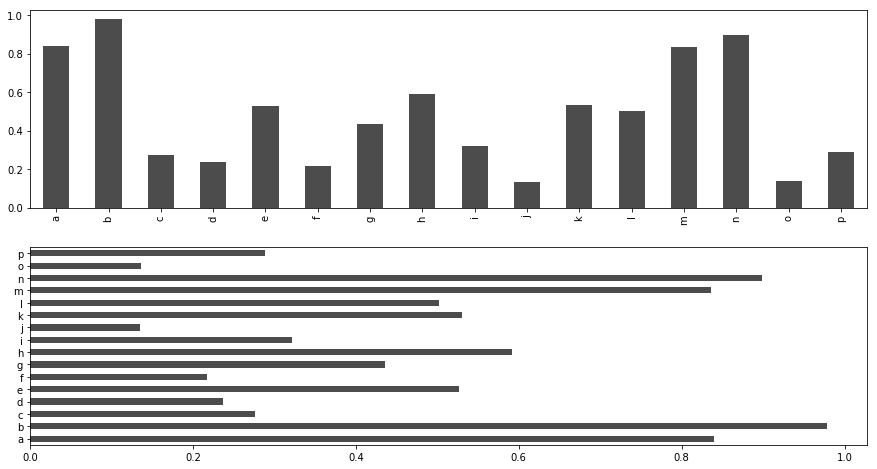

In [14]:
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15,8)
data = pd.Series(np.random.rand(16),index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0],color='k',alpha=0.7)
data.plot.barh(ax=axes[1],color='k',alpha=0.7)

__Note :__ avec une série on plot pour chaque index la hauteur

Genus,A,B,C,D
one,0.078237,0.641463,0.821453,0.007529
two,0.105883,0.725878,0.895009,0.313945
three,0.122659,0.587924,0.669677,0.812206
four,0.455185,0.019517,0.712509,0.661249
five,0.637236,0.952158,0.215565,0.413930
six,0.133272,0.416763,0.442091,0.775223


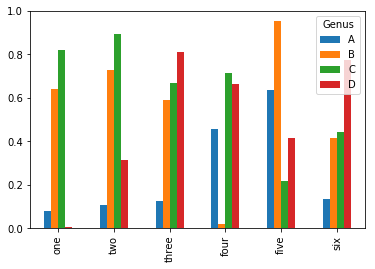

In [15]:
df = pd.DataFrame(np.random.rand(6,4), index=['one','two','three','four','five','six'],
                 columns=pd.Index(['A','B','C','D'],name='Genus'))
df.plot.bar()
df

__Note :__ Pour chaque ligne on met les barres côte à côte des différentes colonnes

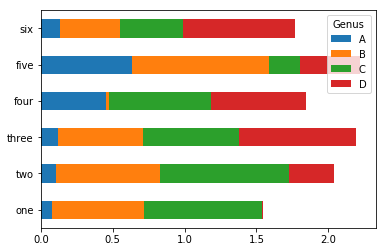

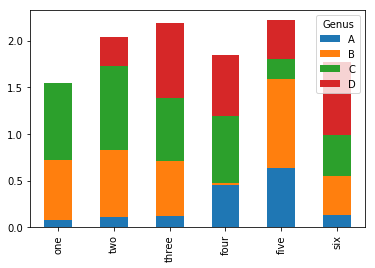

In [16]:
df.plot.barh(stacked=True)
df.plot.bar(stacked=True)

In [17]:
import seaborn as sns

### Without seaborn

In [18]:
tips = pd.read_csv('../../data/tips.csv')
party_counts = pd.crosstab(tips['day'],tips['size'])

In [19]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


__Remarque:__ crosstabl étudie relation entre deux colonnes. Par défaut, analyse de fréquence. Sinon on peut passer une fonction d'aggrégation (agg function)

In [20]:
party_counts=party_counts.loc[:,2:5] # on supprime avec 1 et six personnes

In [21]:
party_counts.div(party_counts.sum(1),axis=0)

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


In [22]:
party_pcts = party_counts.div(party_counts.sum(1),axis=0)
#party_counts.div([1,4,3,2],axis=0)

# pour chaque ligne on divise chaque valeur par la somme de chaque ligne, on normalise

In [23]:
party_counts.sum(1) # somme par ligne, si 0 alors par colonne

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

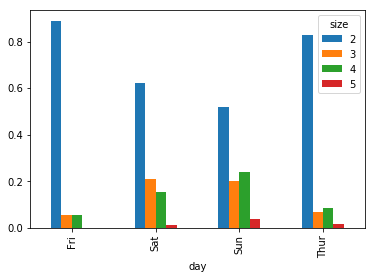

In [24]:
party_pcts.plot.bar()

### With seaborn

In [25]:
tips['tip_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])

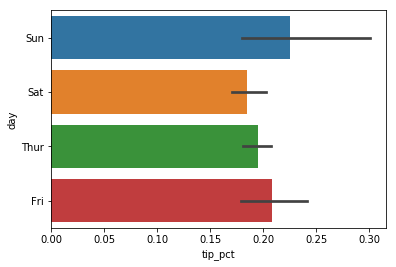

In [26]:
sns.barplot(x='tip_pct',y='day',data=tips,orient='h')

__Notes :__ crosstable c'est étudier la relation entre deux variables. Avec barplot on raccourcit travail et on lui donne deux colonnes et le dataframe dans lequel il faut chercher les colonnes. L'intervalle de confiance est calculé avec la moyenne, l'écart-type empirique et la table de la normale.

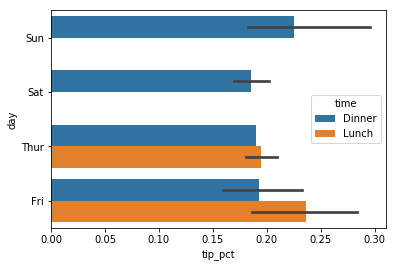

In [27]:
sns.barplot(x='tip_pct',y='day',hue='time',data=tips, orient='h')
# si je veux séparer le déjeuner du midi

## Histograms and Density Plots

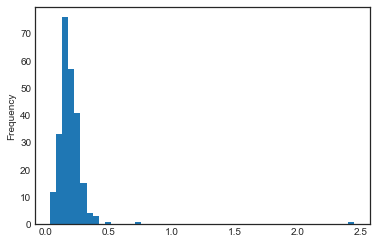

In [33]:
tips['tip_pct'].plot.hist(bins=50)

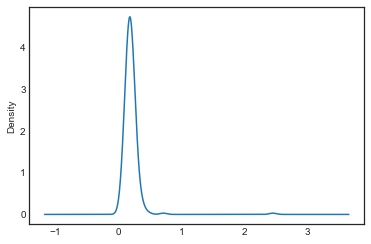

In [34]:
tips['tip_pct'].plot.density()

### Densité avec approximation

In [35]:
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values=pd.Series(np.concatenate([comp1,comp2]))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


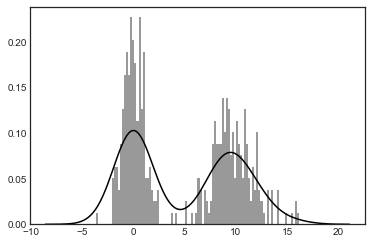

In [52]:
sns.distplot(values,bins=100,color='k')

## Scatter or Points Plots

In [53]:
macro = pd.read_csv('../../data/macrodata.csv')

In [55]:
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [56]:
data = macro[['cpi','m1','tbilrate','unemp']]

In [59]:
trans_data = np.log(data).diff().dropna()

Text(0.5,1,'Changes in log m1 versus log unemp')

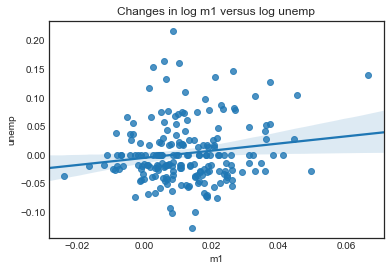

In [64]:
sns.regplot('m1','unemp',data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1','unemp'))

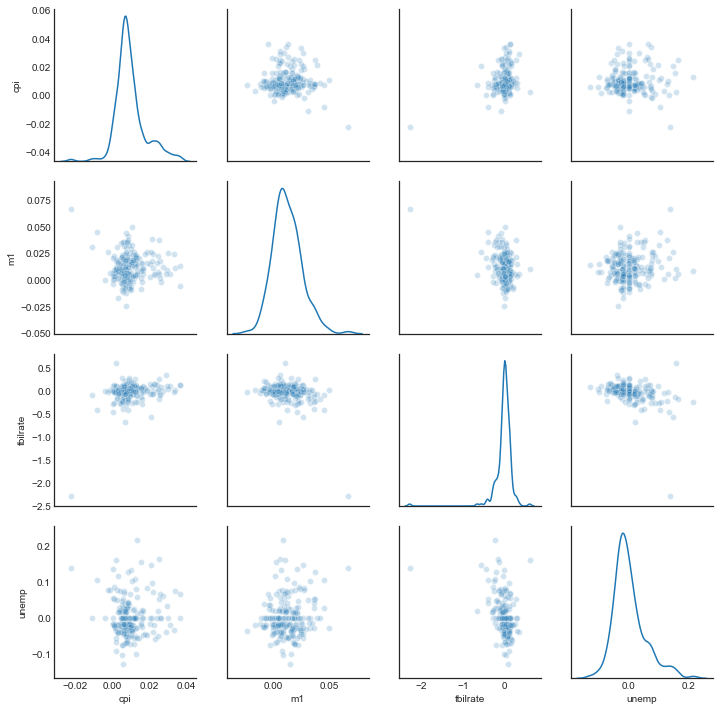

In [69]:
sns.pairplot(trans_data,diag_kind='kde',plot_kws={'alpha':0.2})
# diag-kind : continu et non barre, alpha transparance

## Facet Grids and Categorical Data

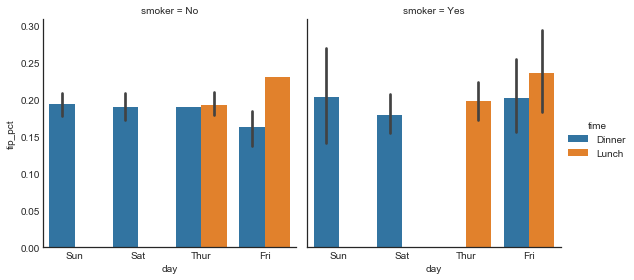

In [74]:
sns.factorplot(x='day',y='tip_pct',hue='time',col='smoker',kind='bar',data=tips[tips.tip_pct<1])

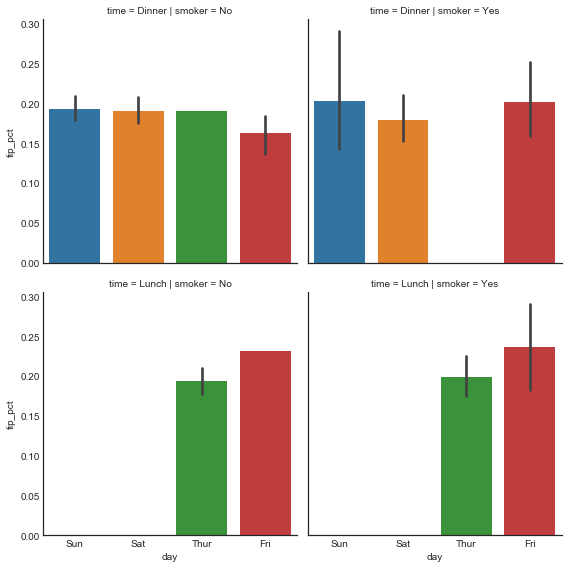

In [75]:
sns.factorplot(x='day',y='tip_pct',row='time',col='smoker',kind='bar',data=tips[tips.tip_pct<1])

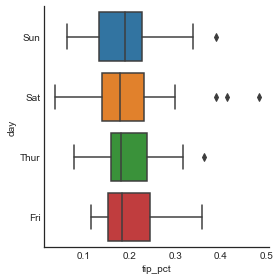

In [76]:
sns.factorplot(x='tip_pct',y='day',kind='box',data=tips[tips.tip_pct<0.5])